In [2]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import nltk
from nltk.corpus import stopwords
import pandas as pd
from sklearn.utils import resample

In [3]:
nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\janna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_excel('../data/DATA_FULL_TRAIN.xlsx')
# df = pd.read_excel('../data/DATA_TRAIN.xlsx')

In [5]:
df

,Texto,Classe
0,SERVICO E LICENCAS DE SOFTWARE DE USO DO CALL CEN,MACHINERY
1,UPGRADE DO SISTEMA DE SEGURANCA DO SITE ALEXANDRE,MACHINERY
2,UPGRADE DO SISTEMA DE SEGURANCA DO SITE ALEXANDRE,MACHINERY
3,REFRIGERADOR 342 L FF CLEAN,MACHINERY
4,REFRIGERADOR 342 L FF CLEAN,MACHINERY
...,...,...
69547,WINSVRDATACTR SNGL LICSAPK MVL 2PROC,SERVICES
69548,WINSVRSTD SNGL LICSAPAK MVL 2PROC,SERVICES
69549,WINSVRSTD SNGL LICSAPAK MVL 2PROC,SERVICES
69550,WINSVRSTD SNGL LICSAPAK MVL 2PROC,SERVICES


In [16]:
m, n = 0, 0

for i in range(df.shape[0]):
    l = df.iloc[i, 0]
    l = l.split()
    l = len(l)

    if l > m:
        m = l
        n = i

In [17]:
m, n

(26, 24781)

## Preprocessing Data

In [18]:
df["Classe"].unique()

array(['MACHINERY', 'SERVICES', 'COMPUTING', 'REAL ESTATE', 'FURNITURE',
       'OUTROS'], dtype=object)

In [19]:
# categoria_map = {
#     'REAL ESTATE': ['LAND', 'IND-BLDG', 'BD-IMPR', 'DP LEASE', 'BD-SVSHV'],
#     'MACHINERY': ['M&E-SEC', 'OFF MACH', 'M&E-ELEC', 'LAB-ELEC', 'AVEQUIP', 'EQUIP-RD', 'PLT,JIGS', 'OFF F&F', 'EQIP-PLT'],
#     'SERVICES': ['DP-SW', 'AUTO T&T', 'INT-TECR', 'AUC', 'LHIMP', 'BC-NLAB', 'DPNONERP', 'BC-LAB', 'DP-PBX', 'BLDG', 'BLDGEQPT'],
#     'COMPUTING': ['DATAPROC', 'DP EQUIP'],
#     'FURNITURE': ['EQIP-MFG', 'OFF F&F']
# }


# def classificar(classe):
#     for categoria, valores in categoria_map.items():
#         if classe in valores:
#             return categoria
#     return 'OUTROS'

# df['Classe'] = df['Classe'].apply(classificar)

In [20]:
nlp = spacy.load("pt_core_news_sm")

def preprocess_text(text, stop_words=[]):
    doc = nlp(text)
    lemmatized_words = [token.lemma_ for token in doc if token.lemma_ not in stop_words and len(token.lemma_) > 1]
    processed_text = ' '.join(lemmatized_words)
    return processed_text.upper()


## Spliting Data

In [21]:
# df['Texto'] = df['Texto'].apply(preprocess_text)

In [22]:
df['Texto'] 

0        SERVICO E LICENCAS DE SOFTWARE DE USO DO CALL CEN
1        UPGRADE DO SISTEMA DE SEGURANCA DO SITE ALEXANDRE
2        UPGRADE DO SISTEMA DE SEGURANCA DO SITE ALEXANDRE
3                              REFRIGERADOR 342 L FF CLEAN
4                              REFRIGERADOR 342 L FF CLEAN
                               ...                        
69547                 WINSVRDATACTR SNGL LICSAPK MVL 2PROC
69548                    WINSVRSTD SNGL LICSAPAK MVL 2PROC
69549                    WINSVRSTD SNGL LICSAPAK MVL 2PROC
69550                    WINSVRSTD SNGL LICSAPAK MVL 2PROC
69551                  WIRELESS MICROPHONE LWM-328C DOUBLE
Name: Texto, Length: 69552, dtype: object

In [23]:
X = df['Texto']
y = df['Classe']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [24]:
X_train

26152                        CORREIA TRANSP 650X4680X9.9MM
62274                       PERSIANA DE ALUMINIO LISO 25MM
3983     REFORMA ITAPEVI-OBRA CIVIL         EQUIP INSTAL P
49278      INSMEQ0157 - LUMINÁRIA FAA02-E414 CE ST 2112300
2540         SMARTPHONE SYMBOL MC35 - SERIE:S8109520800750
                               ...                        
22707                                     BOMBA HIDRAULICA
64575                       POLTRONA GIRATÓRIA 16002 SREMC
30512                     CADEIRA FIXA ESTOFADA EM COURVIN
871               CADEIRA FIXA ESTOFADA EM TECIDO C/BRACOS
6724                 MO PARA INSTALACAO DE REDE SPRINKLERS
Name: Texto, Length: 48686, dtype: object

## Models and Testing

In [25]:
# ### Testing Unit Models

# models = [
#     SVC(probability=True),
#     MLPClassifier(hidden_layer_sizes=(100, 50, 10), max_iter=300, activation='relu', solver='adam'),
#     DecisionTreeClassifier(),
#     RandomForestClassifier(),
#     MultinomialNB(),
#     KNeighborsClassifier(n_neighbors=3, metric="euclidean"),
# ]


# for model in models:
#     print(f"-- {model}", end=" ")
#     pipeline = Pipeline([
#         ('vectorizer', TfidfVectorizer()),
#         ('classifier', model)
#     ])
#     pipeline.fit(X_train, y_train)
#     print(f'Score: {pipeline.score(X_test, y_test)}')
# print()

In [26]:
svm_classifier = SVC(probability=True, random_state=42)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50, 10), max_iter=300, solver='adam', activation='relu', random_state=42)
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
random_forest_classifier = RandomForestClassifier(random_state=42)
naive_bayes_classifier = MultinomialNB()
knn_classifier = KNeighborsClassifier(n_neighbors=3, metric="euclidean")

ensemble_classifier = VotingClassifier(estimators=[
    ('svm', svm_classifier),
    ('mlp', mlp_classifier),
    ('decision_tree', decision_tree_classifier),
    ('random_forest', random_forest_classifier),
    ('naive_bayes', naive_bayes_classifier),
    ('knn', knn_classifier),
], voting='soft') 

In [27]:
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', ensemble_classifier)
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier',
                 VotingClassifier(estimators=[('svm',
                                               SVC(probability=True,
                                                   random_state=42)),
                                              ('mlp',
                                               MLPClassifier(hidden_layer_sizes=(100,
                                                                                 50,
                                                                                 10),
                                                             max_iter=300,
                                                             random_state=42)),
                                              ('decision_tree',
                                               DecisionTreeClassifier(random_state=42)),
                                              ('random_forest',
                                               RandomForestClassifier(random_state=42)),
                                              ('naive_bayes', MultinomialNB()),
                                              ('knn',
                                               KNeighborsClassifier(metric='euclidean',
                                                                    n_neighbors=3))],
                                  voting='soft'))])

In [28]:
print(f'Score: {pipeline.score(X_test, y_test)*100:.2f}%')

Score: 95.58%


In [29]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import cross_val_score

# stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# cross_val_accuracy = cross_val_score(pipeline, X, y, cv=stratified_kfold, scoring='accuracy')
# print(f'Cross-Validation Accuracy: {cross_val_accuracy.mean():.5f}')

c:\Users\janna\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [1]:
y_pred = pipeline.predict(X_test)

NameError: name 'pipeline' is not defined

## Results

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score

print(f1_score(y_test, y_pred, average="weighted"))
print(recall_score(y_test, y_pred, average="weighted"))
print(precision_score(y_test, y_pred, average="weighted"))

0.9353673838161976
0.9361876640419947
0.9361898029640054


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

   COMPUTING       0.99      0.98      0.98      2260
   FURNITURE       0.86      0.74      0.79       449
   MACHINERY       0.90      0.95      0.93      2398
 REAL ESTATE       0.91      0.50      0.65        20
    SERVICES       0.93      0.90      0.92       969

    accuracy                           0.94      6096
   macro avg       0.92      0.81      0.85      6096
weighted avg       0.94      0.94      0.94      6096



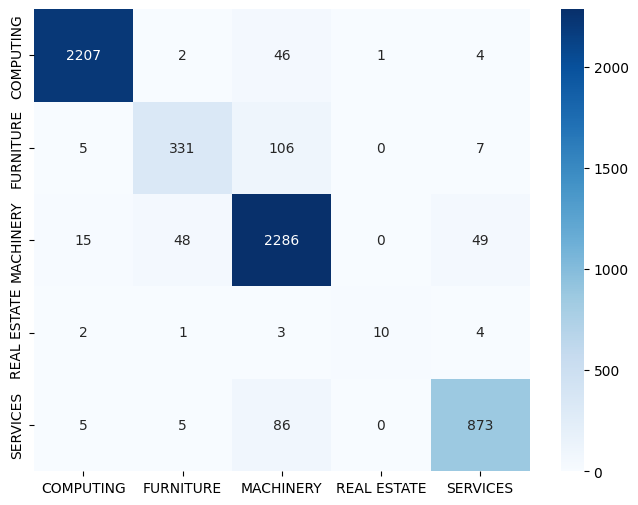

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.show()

## Resampling and spliting Data 30 times

In [ ]:
# split 70/30 - sem randon_state por 30x
# shapley values
# https://github.com/sherbold/autorank
# boxplot

In [ ]:
accuracy = []
id = []

In [ ]:
for i in range(30):
    X_resampled, y_resampled = resample(X, y, replace=True)
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, stratify=y)
    pipeline.fit(X_train, y_train)

    score = pipeline.score(X_test, y_test)
    id.append(i+1)
    accuracy.append(score)
    print(f"Round {i+1} - Score: {score}")

Round 1 - Score: 0.9630905511811023
Round 2 - Score: 0.9634186351706037
Round 3 - Score: 0.9625984251968503
Round 4 - Score: 0.9665354330708661
Round 5 - Score: 0.9639107611548556
Round 6 - Score: 0.963746719160105
Round 7 - Score: 0.9601377952755905
Round 8 - Score: 0.9630905511811023
Round 9 - Score: 0.9621062992125984
Round 10 - Score: 0.9606299212598425
Round 11 - Score: 0.95751312335958
Round 12 - Score: 0.9616141732283464
Round 13 - Score: 0.9563648293963255
Round 14 - Score: 0.9586614173228346
Round 15 - Score: 0.9665354330708661
Round 16 - Score: 0.9612860892388452
Round 17 - Score: 0.9614501312335958
Round 18 - Score: 0.9609580052493438
Round 19 - Score: 0.9607939632545932
Round 20 - Score: 0.9573490813648294
Round 21 - Score: 0.9617782152230971
Round 22 - Score: 0.9640748031496063
Round 23 - Score: 0.9625984251968503
Round 24 - Score: 0.9662073490813649
Round 25 - Score: 0.9644028871391076
Round 26 - Score: 0.9639107611548556
Round 27 - Score: 0.9604658792650919
Round 28 - Sc

## Autorank

In [ ]:
data = pd.DataFrame()
data["id"] = id
data["results"] = accuracy

In [ ]:
data.head()

,id,results
0,1,0.963091
1,2,0.963419
2,3,0.962598
3,4,0.966535
4,5,0.963911


In [ ]:
from autorank import autorank, plot_stats, create_report, latex_table, latex_report

In [ ]:


np.random.seed(42)
pd.set_option('display.max_columns', 7)

result = autorank(data, alpha=0.05, verbose=False)
print(result)

RankResult(rankdf=
         meanrank       mean       std   ci_lower   ci_upper effect_size  \
results       2.0   0.962057  0.002582   0.960943   0.963171         0.0   
id            1.0  15.500000  8.803408  11.700649  19.299351   -2.335431   

          magnitude  
results  negligible  
id            large  
pvalue=6.114073489561223e-10
cd=None
omnibus=ttest
posthoc=None
all_normal=True
pvals_shapiro=[0.5707787871360779, 0.2662297487258911]
homoscedastic=False
pval_homogeneity=2.8530837314073145e-94
homogeneity_test=bartlett
alpha=0.05
alpha_normality=0.025
num_samples=30
posterior_matrix=
None
decision_matrix=
None
rope=None
rope_mode=None
effect_size=cohen_d
force_mode=None)


In [ ]:
latex_table(result)

\begin{table}[h]
\centering
\begin{tabular}{lrrrlll}
\toprule
 & MR & M & SD & CI & $d$ & Magnitude \\
\midrule
results & 2.000 & 0.962 & 0.003 & [0.961, 0.963] & 0.000 & negligible \\
id & 1.000 & 15.500 & 8.803 & [11.701, 19.299] & -2.335 & large \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_results}
\end{table}


\documentclass{article}

\usepackage{graphicx}
\usepackage{booktabs}

\begin{document}

\section{Results}
\label{sec:results}

The statistical analysis was conducted for 2 populations with 30 paired samples.
The family-wise significance level of the tests $\alpha$=0.050.
We failed to reject the null hypothesis that the population is normal for all populations (minimal observed p-value=0.266). Therefore, we assume that all populations are normal.
No check for homogeneity was required because we only have two populations.
Because we have only two populations and both populations are normal, we use the t-test to determine differences between the mean values of the populations and report the mean value (M)and the standard deviation (SD) for each population. 
We reject the null hypothesis (p=0.000) of the paired t-test that the mean values of the populations results (M=0.962$\pm$0.001, SD=0.003) and id (M=15.500$\pm$3.799, SD=8.803) are equal. Therefore, we assume that the mean value of res

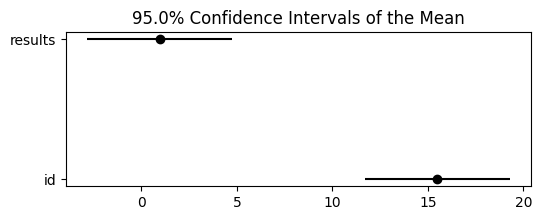

In [ ]:
latex_report(result)

## Shapley Values

In [ ]:
import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [ ]:
y_t = y_train[:20]
X_t = X_train[:20]

In [ ]:
X_transformed = pipeline.named_steps["vectorizer"].transform(X_t).toarray()

In [ ]:
from sklearn.preprocessing import LabelEncoder
 
y_train_s = LabelEncoder().fit_transform(y_train)

In [ ]:
from sklearn.base import BaseEstimator
from sklearn_rvm import EMRVR

class RVRWrapper(BaseEstimator):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

# Assuming X_t and y_t are your training data
model_rvr = RVRWrapper(EMRVR(kernel="linear"))
model_rvr.fit(X_transformed, y_t)
explainer = shap.KernelExplainer(model_rvr.predict, X_transformed)

Hessian not positive definite


In [ ]:
shap_values = explainer.shap_values(X_transformed, fixed_context=1)

100%|██████████| 20/20 [01:16<00:00,  3.84s/it]


In [ ]:
feature_importance = np.sum(np.abs(shap_values), axis=0)

feature_names = pipeline.named_steps['vectorizer'].get_feature_names_out()
top_features = np.argsort(feature_importance)[::-1][:10]

print("Top 10 Features:")

for idx in top_features:
    print(f"{feature_names[idx]}: {feature_importance[idx]}")

Top 10 Features:
rodizios: 1.6279598158338904
limit: 1.055819436051492
a3: 0.9779518528113558
giratoria: 0.9162523998743858
line: 0.8424826836371467
audi: 0.8269416598770469
sedan: 0.7444736828393368
tecido: 0.7231805685366554
estofamento: 0.6723474095988325
cadeira: 0.665832533980438


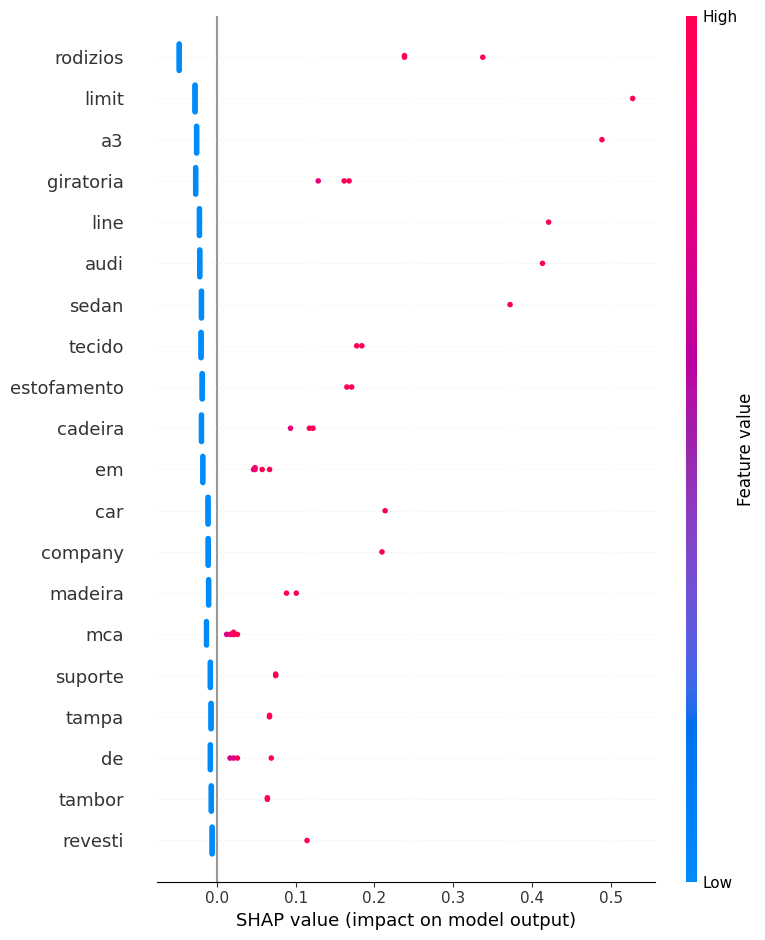

In [ ]:
overall_importance = np.sum(np.abs(shap_values), axis=0)

shap.summary_plot(shap_values, X_transformed, feature_names=feature_names)

## Testing With Real Values

In [ ]:
df_cog = pd.read_excel("../data/relatorio-analitico-cognita-75071.xlsx")

In [ ]:
df_cog = df_cog[["DESCRIÇÃO", "USUÁRIO"]]

In [ ]:
df_cog

,DESCRIÇÃO,USUÁRIO
0,ARMARIO BAIXO EM MELAMINA C/4 PORTAS E TAMPA D...,mike
1,QUADRO BRANCO C/ CAVALETE,orlando.neto
2,NICHO,orlando.neto
3,NICHO,mike
4,CLIMATIZADOR,mike
...,...,...
4257,LONGARINA EM COURVIN C/ 2 LUGARES,bryan.martins
4258,LONGARINA EM COURVIN C/ 2 LUGARES,bryan.martins
4259,LONGARINA EM COURVIN C/ 2 LUGARES,bryan.martins
4260,REFLETOR,gustavo.harlocchi


In [ ]:
df_cog.dropna(inplace=True)

In [ ]:
pred_cog = pipeline.predict(df_cog["DESCRIÇÃO"])

In [ ]:
df_cog["Classe"] = pred_cog

In [ ]:
df_cog

,DESCRIÇÃO,USUÁRIO,Classe
0,ARMARIO BAIXO EM MELAMINA C/4 PORTAS E TAMPA D...,mike,FURNITURE
1,QUADRO BRANCO C/ CAVALETE,orlando.neto,MACHINERY
2,NICHO,orlando.neto,FURNITURE
3,NICHO,mike,FURNITURE
4,CLIMATIZADOR,mike,MACHINERY
...,...,...,...
4257,LONGARINA EM COURVIN C/ 2 LUGARES,bryan.martins,MACHINERY
4258,LONGARINA EM COURVIN C/ 2 LUGARES,bryan.martins,MACHINERY
4259,LONGARINA EM COURVIN C/ 2 LUGARES,bryan.martins,MACHINERY
4260,REFLETOR,gustavo.harlocchi,MACHINERY


In [ ]:
df_cog.to_excel("PREDICOES_COGNITA.xlsx", index=False)

## Generating Pickle File

In [ ]:
import joblib
import pandas as pd

In [ ]:
df = pd.read_excel("../data/relatorio-analitico-cognita_playpen.xlsx")

In [ ]:
df = df[["DESCRIÇÃO", "USUÁRIO"]]

In [ ]:
df

,DESCRIÇÃO,USUÁRIO
0,CADEIRA GIRATORIA DE PLASTICO C/ RODIZIOS,luan.marchiotto
1,CADEIRA GIRATORIA DE PLASTICO C/ RODIZIOS,luan.marchiotto
2,PIA DE ACO INOX,gustavo.harlocchi
3,BANCADA DE ACO FRIA,gustavo.harlocchi
4,CONDICIONADOR AR,gustavo.harlocchi
...,...,...
2958,BANCO DE MELAMINA,gustavo.harlocchi
2959,MONITOR 18 POL,gustavo.harlocchi
2960,TELEVISOR 42 POLEGADAS,luan.marchiotto
2961,NOTEBOOK,luan.marchiotto


In [ ]:
reg = joblib.load('../models/voting_classifier.joblib')

In [ ]:
predictions = reg.predict(df["DESCRIÇÃO"])
predictions

array(['FURNITURE', 'FURNITURE', 'MACHINERY', ..., 'MACHINERY',
       'COMPUTING', 'FURNITURE'], dtype=object)

In [ ]:
df["Classe"] = predictions

In [ ]:
df.to_excel("PREDICOES_COGNITA_PLAYPEN.xlsx", index=False)

## Word2vec e Wavelets

In [27]:
df["Texto"].shape

(69552,)

In [9]:
sentences = [[word for word in text.split()] for text in df["Texto"]]

In [10]:
sentences

[['SERVICO',
  'E',
  'LICENCAS',
  'DE',
  'SOFTWARE',
  'DE',
  'USO',
  'DO',
  'CALL',
  'CEN'],
 ['UPGRADE', 'DO', 'SISTEMA', 'DE', 'SEGURANCA', 'DO', 'SITE', 'ALEXANDRE'],
 ['UPGRADE', 'DO', 'SISTEMA', 'DE', 'SEGURANCA', 'DO', 'SITE', 'ALEXANDRE'],
 ['REFRIGERADOR', '342', 'L', 'FF', 'CLEAN'],
 ['REFRIGERADOR', '342', 'L', 'FF', 'CLEAN'],
 ['REFRIGERADOR', 'FFREE', 'BTOUCH', '459L'],
 ['SAP', 'BRA'],
 ['NOTEBOOK', 'E32', 'TW/E3-1225V3/4GB/500GB/W8PRO/DVDRW//'],
 ['SCANNER', 'CANON', 'DR-6030C'],
 ['SCANNER', 'CANON', 'DR-6030C'],
 ['SCANNER', 'CANON', 'DR-6030C'],
 ['SCANNER', 'CANON', 'DR-6030C'],
 ['EVISOR', 'LG', '42', 'LG42LN5700', 'LED'],
 ['SERVIDOR', 'LENOVO', 'TS140'],
 ['DESKTOP', 'M93P', 'TW/I5'],
 ['DESKTOP', 'M93P', 'TW/I5'],
 ['DESKTOP', 'M93P', 'TW/I5'],
 ['DESKTOP', 'M93P', 'TW/I5'],
 ['DESKTOP', 'M93P', 'TW/I5'],
 ['DESKTOP', 'M93P', 'TW/I5'],
 ['DESKTOP', 'M93P', 'TW/I5'],
 ['DESKTOP', 'M93P', 'TW/I5'],
 ['DESKTOP', 'M93P', 'TW/I5'],
 ['DESKTOP', 'M93P', 'TW/I5']

In [21]:
from gensim.models import Word2Vec
model = Word2Vec(sentences, vector_size=50, window=5, sg=0, min_count=1)

In [39]:
words = list(model.wv.index_to_key)
vectors = np.array([model.wv[word] for word in words]) 

In [44]:
w2v_array = [[] for i in range(len(vectors))]

In [49]:
for i in range(len(vectors)):
    for j in vectors[i]:
        w2v_array[i].append(j)
    
    while len(w2v_array[i]) < 2048:
        w2v_array[i].append(0)

In [52]:
len(w2v_array), len(w2v_array[12])

(27910, 2048)

In [54]:
import pywt

In [84]:
v1 = w2v_array[0]

In [86]:
wp = pywt.WaveletPacket(data=v1, wavelet='db1', mode='sym', maxlevel=6)

# Exibindo informações sobre o objeto WaveletPacket
print("\nInformações sobre o objeto WaveletPacket:")
print(f"  Dados: {wp.data}")
print(f"  Caminho na árvore de decomposição: {repr(wp.path)}")
print(f"  Nível de decomposição: {wp.level}")
print(f"  Nível máximo alcançado: {wp['ad'].maxlevel}")


Informações sobre o objeto WaveletPacket:
  Dados: [-1.1173986, -0.6356182, 0.056430724, 1.9573915, 0.10091717, -0.6801596, -0.37889805, 2.1919487, 0.590067, 1.4822289, 1.1184853, -1.9373285, 1.866349, 4.462804, 0.935122, -1.2814912, -0.5096869, -1.4000324, -0.054761305, -0.9116804, 1.1408923, 1.3015893, 0.7518454, 2.6188166, 1.5510784, 1.6135014, 1.088714, -0.115401626, -0.51009613, 1.8700925, -1.6287477, 0.2099101, 1.7226049, 0.18298972, 0.500241, 0.44555575, -0.278841, -0.5277586, -0.03455626, 1.3716058, 0.42009735, -0.4037542, -0.7733507, -1.1126566, 2.8885672, 1.491325, -0.026953643, 0.46898854, 1.2770911, 1.1795949, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [119]:
wp.get_level(6)[63].data

array([-0.37387353,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

In [120]:
def calcular_energia(array):
    return sum(x ** 2 for x in array)

In [129]:
def entropia(sinal):
    valores, contagens = np.unique(sinal, return_counts=True)
    prob = contagens / contagens.sum()
    entropia = np.sum(prob * np.log2(prob))
    return entropia

In [131]:
energy = []
entropiaArray = []

In [132]:
for i in range(63):
    energy.append(calcular_energia(wp.get_level(6)[i].data))
    entropiaArray.append(entropia(wp.get_level(6)[i].data))

In [133]:
print(energy)
print(sum(energy))

print(entropiaArray)
print(sum(entropiaArray))

[9.40777240369544, 0.7560505429946711, 0.4886419930369204, 0.07307572429312592, 0.2496784909740364, 1.4914380258936033, 0.6861351900620273, 0.10339815679497784, 2.29101090733923, 1.071468459078398, 1.0092961219346932, 0.49308015812401207, 0.08552033829858352, 6.62993529135059, 8.408704365412618, 1.5896543066989943, 2.8981720815559453, 0.0057545560497906925, 0.09832583592642233, 0.05586043835410779, 11.504583402500701, 5.062488576520163, 5.2698818431720555, 0.005559780705245322, 0.07818779279767359, 1.3474039918486904, 0.5522368706713356, 0.15676842567372892, 1.748327282912347, 0.33254446404007215, 0.31917349072392476, 0.011154007702928029, 0.15476833120514696, 1.0881796322985076, 0.17775432681233977, 0.03218259400449708, 0.3436123128275145, 0.04149704801850606, 1.715435014453373, 0.7718004349195849, 3.1492462894516837, 0.9937836230834324, 0.28476145271927195, 1.5941762661203065, 0.07121476392222127, 0.8347688474158658, 0.01106000539939262, 0.2429318906682161, 0.037875349730727995, 1.46

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Obter os vetores e as palavras do modelo
words = list(model.wv.index_to_key)
vectors = np.array([model.wv[word] for word in words])  # Converter para array numpy

# Reduzir a dimensionalidade para 2D usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
vectors_2d = tsne.fit_transform(vectors)

# Criar um gráfico de dispersão
plt.figure(figsize=(10, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], s=5)

# Adicionar rótulos às palavras no gráfico
for i, word in enumerate(words):
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=8)

plt.title('Visualização do Modelo Word2Vec (CBOW, 50 dimensões)')
plt.show()